In [1]:
from __future__ import annotations


In [2]:
from config.dl_model_config import DLModelConfig

from ipsqt.prediction.dl.dl_predictor import DLClassifier as Predictor
from ipsqt.prediction.dl.models.transformer import TransformerClassifier as Model
from ipsqt.strategies.predicted.momentum_reversal_strategy import (
    MomentumReversalStrategy as Strategy,
)

from run import initialize

In [3]:
REBAL_FREQ = "ME"
RETRAIN_NUM_DAYS = 30
SAVE = True

In [4]:
preprocessor, runner = initialize()

model_config = DLModelConfig()
model_config.n_features = len(runner.available_features)
print(runner.available_features)
model_config.n_classes = 2

model_config.n_epochs = 10

predictor = Predictor(
    model_cls=Model,
    model_config=model_config,
    verbose=False,
)

strategy = Strategy(
    predictor=predictor,
    retrain_num_days=RETRAIN_NUM_DAYS,
)

strategy_name = strategy.__class__.__name__
model_name = predictor.model.__class__.__name__

Backtest on 1992-08-31 00:00:00 to 2024-05-31 00:00:00
Num Train Iterations: 365
Num OOS Daily Points: 365
['CAPE', 'STP', 'M2', '_OIL', 'lagged_MKT']


In [5]:
result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)

Computing Weights:   0%|          | 0/365 [00:00<?, ?it/s]/Users/buchkovv/ipsqt/ipsqt/prediction/dl/models/transformer.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_final = torch.tensor(pos_final).to(device)
/Users/buchkovv/ipsqt/ipsqt/prediction/dl/models/transformer.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_final = torch.tensor(pos_final).to(device)
Computing Weights:   0%|          | 1/365 [00:04<26:48,  4.42s/it]/Users/buchkovv/ipsqt/ipsqt/prediction/dl/models/transformer.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(s

In [6]:
print(result)

StrategyStatistics:
* final_nav = 0.939966
* geom_avg_total_r = -0.001864
* geom_avg_xs_r = -0.023130
* std_xs_r = 0.152387
* min_xs_r = -0.244696
* max_xs_r = 0.279921
* skew = -0.014158
* kurtosis = 5.401218
* max_dd = -0.659817
* sharpe = -0.151785
* alpha_buy_hold = -0.094295
* tracking_error_buy_hold = 0.211789
* ir_buy_hold = -0.445233
* factor_loadings = {'MKT_Factor': 0.02001034952663422}
* alpha_benchmark = -0.024748
* alpha_benchmark_pvalue = 0.632402
* tracking_error_benchmark = 0.152148
* ir_benchmark = -0.162657
* ttest_pval = 0.992533
* levene_pval = 0.428587
* timing_ability_coef = -0.335754
* timing_ability_pval = 0.035736


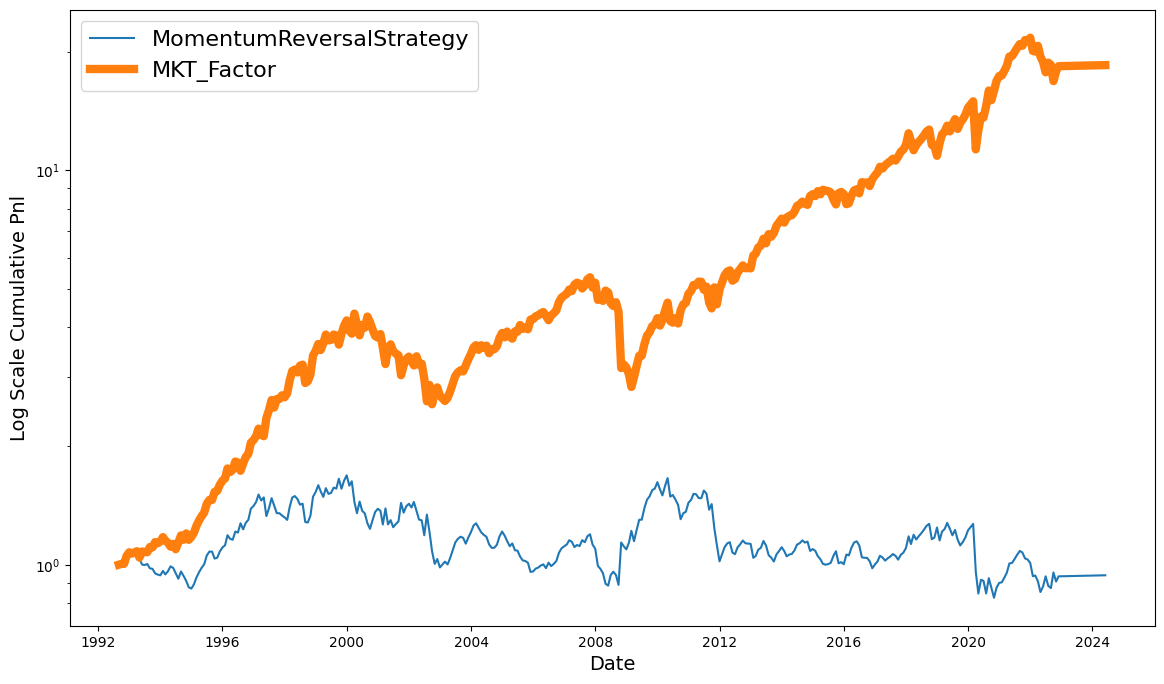

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

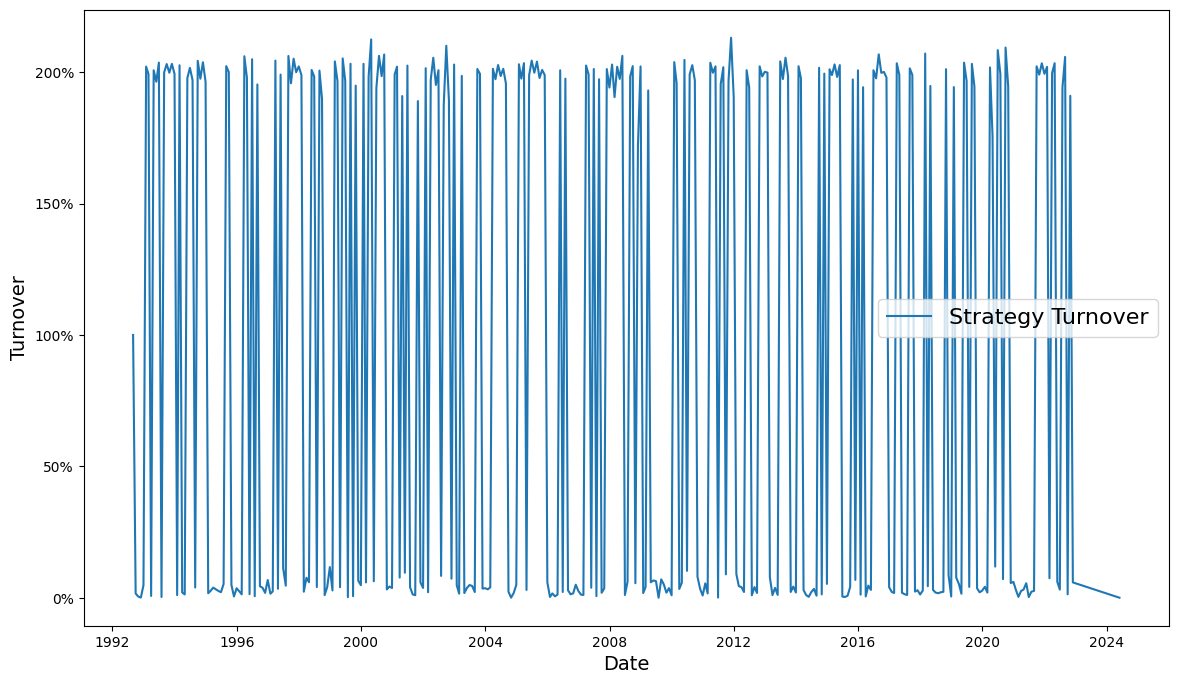

In [8]:
runner.plot_turnover()

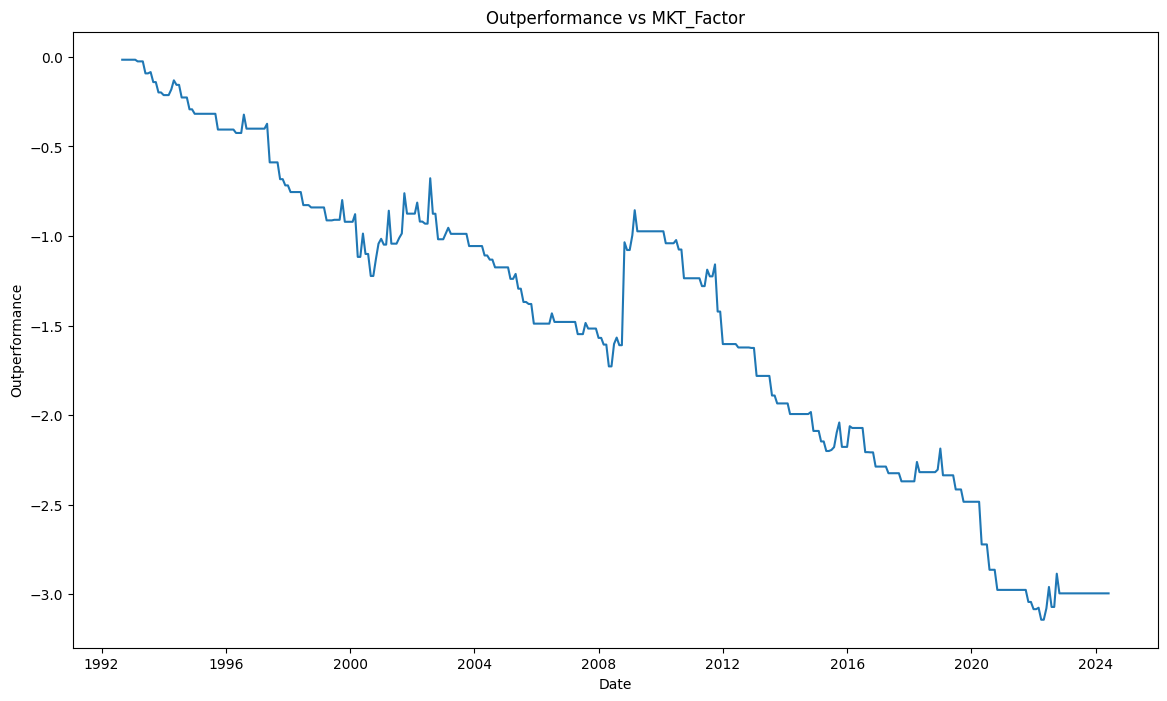

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
if SAVE:
    runner.save(f"{strategy_name}_" + model_name + f"_rebal{REBAL_FREQ}")

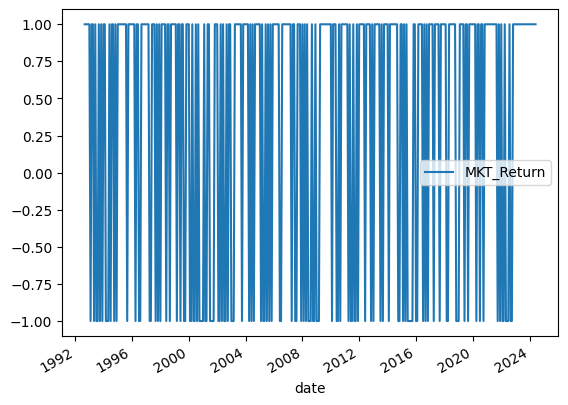

In [11]:
runner.strategy_weights.plot();